# Datos de NHANES para nuestro analisis

### Importar Librerias

In [1]:
import janitor
import nhanes.load
import numpy as np
import pandas as pd
import missingno

### Importar funciones personalizadas

In [2]:
%run utils.ipynb

### Cargar Datos de NHANES

In [3]:
# obtener los datos del periodo 2017 - 2018
(
    nhanes.load.load_NHANES_data(year='2017-2018')
)

,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,TypeOfMilkFirstFed1Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
SEQN,,,,,,,,,,,,,,,,,,,,,
93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102952.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.0,0.0,Never
102953.0,Fair or,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,65.0,218.0,0.0,Never
102954.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,66.0,150.0,0.0,Never


In [6]:
# modificar nombre de las columnas con separadores '_'

nhanes_raw_df = (
    nhanes.load.load_NHANES_data(year='2017-2018')
    .clean_names(case_type = 'snake')
)

nhanes_raw_df.shape

(8366, 197)

### Procesar Datos de NHANES

In [14]:
# seleccionar variables con las que vamos a trabajar

nhanes_df = (
    nhanes_raw_df
    .select_columns(
        "general_health_condition",
        "age_in_years_at_screening",
        "gender",
        "current_selfreported_height_inches",
        "current_selfreported_weight_pounds",
        "doctor_told_you_have_diabetes",
        "60_sec_pulse30_sec_pulse2",
        "total_cholesterol_mgdl"
    )   # cambiar nombre de las columnas seleccionadas mediante un dict
    .rename_columns(
        {
            "age_in_years_at_screening":"age",
            "current_selfreported_height_inches":"height",
            "current_selfreported_weight_pounds":"weight",
            "doctor_told_you_have_diabetes":"diabetes",
            "60_sec_pulse30_sec_pulse2":"pulse",
            "total_cholesterol_mgdl":"total_cholesterol"
        }
    )   # sustituir valores que representan missing por NaN
    .replace(
        {
            'height':{
                9999: np.nan,
                7777: np.nan
            },
            'weight':{
                9999: np.nan,
                7777: np.nan
            },
            'diabetes':{
                'Borderline': np.nan
            }
        }
    )   # ordenar las variables segun su cantidad de valores faltantes
    .missing.sort_variables_by_missingness()
    .dropna(    # eliminar todas las observaciones con diabetes nula ya que son pocas
        subset =['diabetes'],
        how='any'
    )   # convertir los valores de diabetes de tipo objeto a entero
    .transform_column(  
        column_name = 'diabetes',
        function = lambda s: s.astype(int),
        elementwise = False
    )
)

nhanes_df

,height,weight,general_health_condition,total_cholesterol,pulse,diabetes,age,gender
SEQN,,,,,,,,
93703.0,NaN,NaN,NaN,NaN,NaN,0,2.0,Female
93704.0,NaN,NaN,NaN,NaN,NaN,0,2.0,Male
93705.0,63.0,165.0,Good,157.0,52.0,0,66.0,Female
93706.0,68.0,145.0,Very good,148.0,82.0,0,18.0,Male
93707.0,NaN,NaN,Good,189.0,100.0,0,13.0,Male
...,...,...,...,...,...,...,...,...
102951.0,NaN,NaN,NaN,NaN,NaN,0,4.0,Male
102953.0,65.0,218.0,Fair or,182.0,78.0,0,42.0,Male
102954.0,66.0,150.0,Good,172.0,78.0,0,41.0,Female


### Visualizar los valores faltantes

<AxesSubplot:>

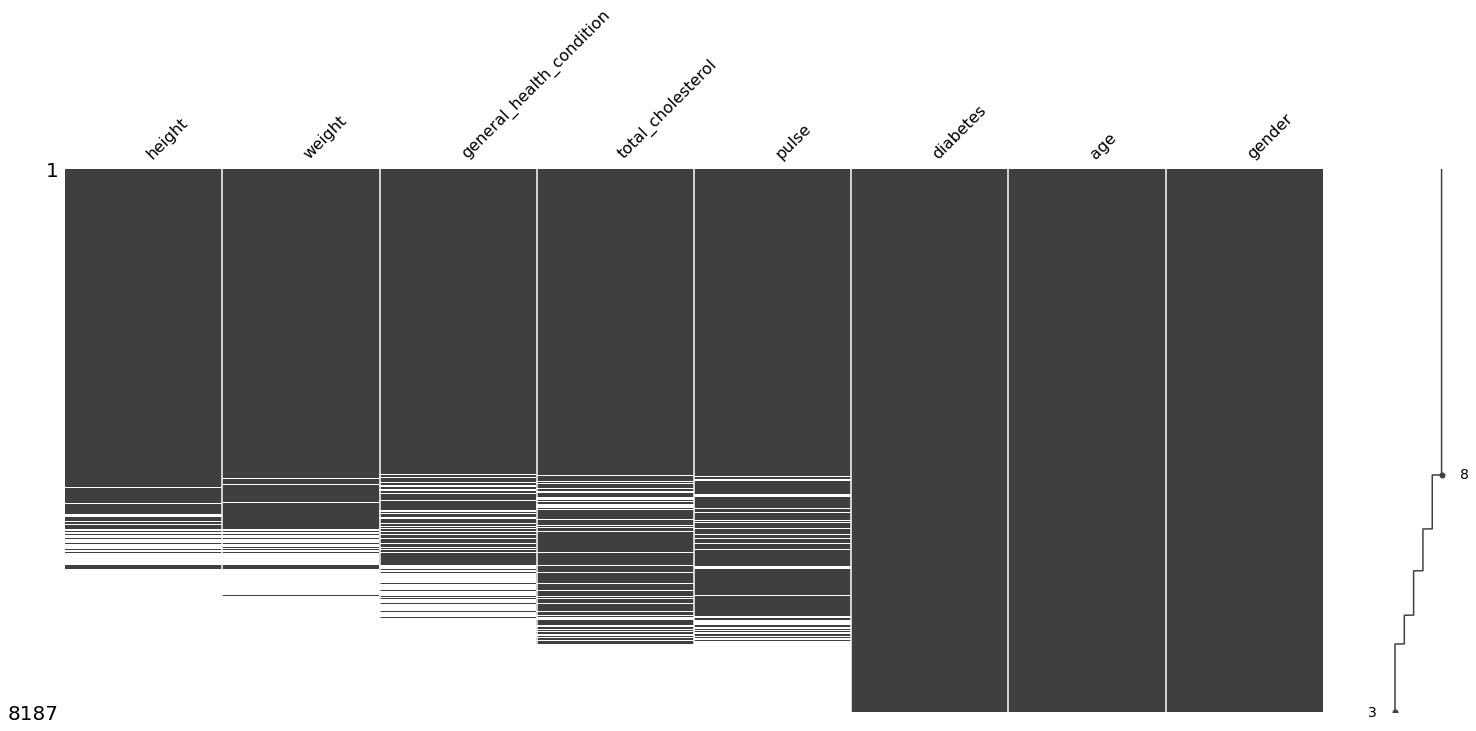

In [16]:
(
    nhanes_df
    .missing.sort_variables_by_missingness()    # ordena missing de mayor a menor
    .pipe(missingno.matrix, sort = 'descending')    # visualizacion mediante una matriz
)